# Chapter 5. Categorical Variables: Counting Eggs in the Age of Robotic Chickens

In [1]:
import pandas as pd
from sklearn import linear_model

## Example 5-1. Linear regression on a categorical variable using one-hot and dummy codes

In [2]:
# 연습용 데이터셋 정의
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


In [3]:
one_hot_df = pd.get_dummies(df, prefix=['city'])
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [4]:
lin_reg = linear_model.LinearRegression()

In [5]:
# 원-핫 인코딩 데이터에 대한 선형회귀모델 학습
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [6]:
lin_reg.intercept_

3333.3333333333335

In [7]:
df['Rent'].mean()

3333.3333333333335

In [8]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [9]:
# 더미 코딩
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [10]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])
lin_reg.coef_

array([  500., -1000.])

In [11]:
lin_reg.intercept_

3500.0

In [12]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

## Example 5-2. Linear regression with effect coding

In [13]:
effect_df = dummy_df.copy()

In [14]:
effect_df.loc[3:5, ['city_SF', 'city_Seattle']] = -1.0
effect_df

,Rent,city_SF,city_Seattle
0,3999,1.0,0.0
1,4000,1.0,0.0
2,4001,1.0,0.0
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,0.0,1.0
7,2500,0.0,1.0
8,2501,0.0,1.0


In [15]:
lin_reg.fit(effect_df[['city_SF', 'city_Seattle']], effect_df['Rent'])
lin_reg.coef_

array([ 666.66666667, -833.33333333])

In [16]:
lin_reg.intercept_

3333.3333333333335

In [17]:
# Effect coding weights + intercept
w3 = lin_reg.coef_
b3 = lin_reg.intercept_

In [18]:
# 각 도시별 임대료 비교 플롯
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

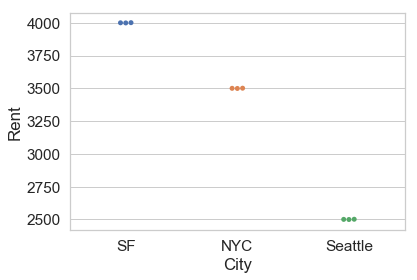

In [19]:
sns.swarmplot(x="City", y="Rent", data=df);

In [20]:
print('One-hot encoding weights: ' ,w1, '\t and intercept: ', b1)
print('Dummy   coding   weights: ', w2, '\t\t\t\t and intercept: ', b2)
print('Effect  coding   weights: ' ,w3, '\t\t and intercept: ', b3)

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333] 	 and intercept:  3333.3333333333335
Dummy   coding   weights:  [  500. -1000.] 				 and intercept:  3500.0
Effect  coding   weights:  [ 666.66666667 -833.33333333] 		 and intercept:  3333.3333333333335


In [21]:
# geometry of one-hot vs. dummy encoding

# Create a list of values in the best fit line for one-hot encoding
one_hot_y = [((w1[0] * one_hot_df.city_NYC[i]) + 
              (w1[1] * one_hot_df.city_SF[i]) +
              (w1[2] * one_hot_df.city_Seattle[i]) + b1) 
             for i in range(0,one_hot_df.shape[0])]

# Create a list of values in the best fit line for dummy coding
dummy_y = [((w2[0] * dummy_df.city_SF[i]) +
            (w2[1] * dummy_df.city_Seattle[i]) + b2)
           for i in range(0,dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0000000000005, 4000.0000000000005, 4000.0000000000005, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
[3999.9999999999995, 3999.9999999999995, 3999.9999999999995, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]


## Example 5-5. Feature hashing

In [22]:
import json
from sklearn.feature_extraction import FeatureHasher
from sys import getsizeof

In [23]:
# 처음 10,000개의 리뷰 로드
f = open('data/yelp/yelp_academic_dataset_review.json', encoding='utf-8')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 9)

In [24]:
# 고유한 business_id 개수
m = len(review_df.business_id.unique())
m

8577

In [25]:
h = FeatureHasher(n_features=m, input_type='string')
f = h.transform(review_df['business_id'])

In [26]:
f.shape

(10000, 8577)

In [27]:
review_df['business_id'].unique().tolist()[0:5]

['iCQpiavjjPzJ5_3gPD5Ebg',
 'pomGBqfbxcqPv14c3XH-ZQ',
 'jtQARsP6P-LbkyjbO1qNGg',
 'elqbBhBfElMNSrjFqW3now',
 'Ums3gaP2qM3W1XcA5r6SsQ']

In [28]:
f.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
print('Our pandas Series, in bytes: ', getsizeof(review_df['business_id']))
print('Our hashed numpy array, in bytes: ', getsizeof(f))

Our pandas Series, in bytes:  790104
Our hashed numpy array, in bytes:  56


## Example 5-6. Bin-counting example

### Click-Through Rate Prediction by Avazu

https://www.kaggle.com/c/avazu-ctr-prediction

* train_subset은 전체 6 GB 데이터 중에서 처음 100K 행만 추출한 데이터셋.

In [30]:
df = pd.read_csv('data/ctr/train.csv')
df.shape

(40428967, 24)

In [31]:
df = df.loc[:99999,:]
df.to_csv('data/ctr/train_subset.csv', index=None)

In [32]:
df = pd.read_csv('data/ctr/train_subset.csv')
df.shape

(100000, 24)

In [33]:
len(df['device_id'].unique())

7202

In [34]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


Features are $\theta$ = [$N^+$, $N^-$, $log(N^+)-log(N^-)$, isRest]

$N^+$ = $p(+)$ = $n^+/(n^+ + n^-)$

$N^-$ = $p(-)$ = $n^-/(n^+ + n^-)$

$log(N^+)-log(N^-)$ = $\frac{p(+)}{p(-)}$

isRest = back-off bin (not shown here)

In [35]:
def click_counting(x, bin_column):
    clicks = pd.Series(x[x['click'] == 1][bin_column].value_counts(), name='clicks')
    no_clicks = pd.Series(x[x['click'] == 0][bin_column].value_counts(), name='no_clicks')
    
    counts = pd.DataFrame([clicks, no_clicks]).T.fillna('0')
    counts['total'] = counts['clicks'].astype('int64') + counts['no_clicks'].astype('int64')
    
    return counts

def bin_counting(counts):
    counts['N+'] = counts['clicks'].astype('int64').divide(counts['total'].astype('int64'))
    counts['N-'] = counts['no_clicks'].astype('int64').divide(counts['total'].astype('int64'))
    counts['log_N+'] = counts['N+'].divide(counts['N-'])

    # 빈 카운팅 특성만 반환하길 원하면 여기서 필터링 한다.
    bin_counts = counts.filter(items= ['N+', 'N-', 'log_N+'])
    return counts, bin_counts

In [36]:
# device_id에 대한 빈 카운팅 예제
bin_column = 'device_id'
device_clicks = click_counting(df.filter(items= [bin_column, 'click']), bin_column)
device_all, device_bin_counts = bin_counting(device_clicks)

In [37]:
# 모든 device_id가 포함되었는지 확인
len(device_bin_counts)

7202

In [38]:
device_all.sort_values(by = 'total', ascending=False).head(4)

,clicks,no_clicks,total,N+,N-,log_N+
a99f214a,15729,71206,86935,0.180928,0.819072,0.220894
c357dbff,33,134,167,0.197605,0.802395,0.246269
31da1bd0,0,62,62,0.000000,1.000000,0.000000
936e92fb,5,54,59,0.084746,0.915254,0.092593


In [39]:
# 피쳐 크기 비교
print('Our pandas Series, in bytes: ', getsizeof(df.filter(items= ['device_id', 'click'])))
print('Our bin-counting feature, in bytes: ', getsizeof(device_bin_counts))

Our pandas Series, in bytes:  7300104
Our bin-counting feature, in bytes:  641002
